In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
boston=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Boston_house.csv')

In [52]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율'''

- 데이터 분포
- 상관계수 확인

--- ols(최소자승법 - 잔차의 제곱의 합을 최소로) 확인

- VIF 다중공선성 확인


--- ols 확인

- 해당변수 스케일링 진행
- 변수 최적 찾아보기


- 다중회귀 ( y값에 대한 여러가지 컬럼 ) boston 데이터

In [53]:
boston.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

## 실제 Target과 변수들의 관계 시각화

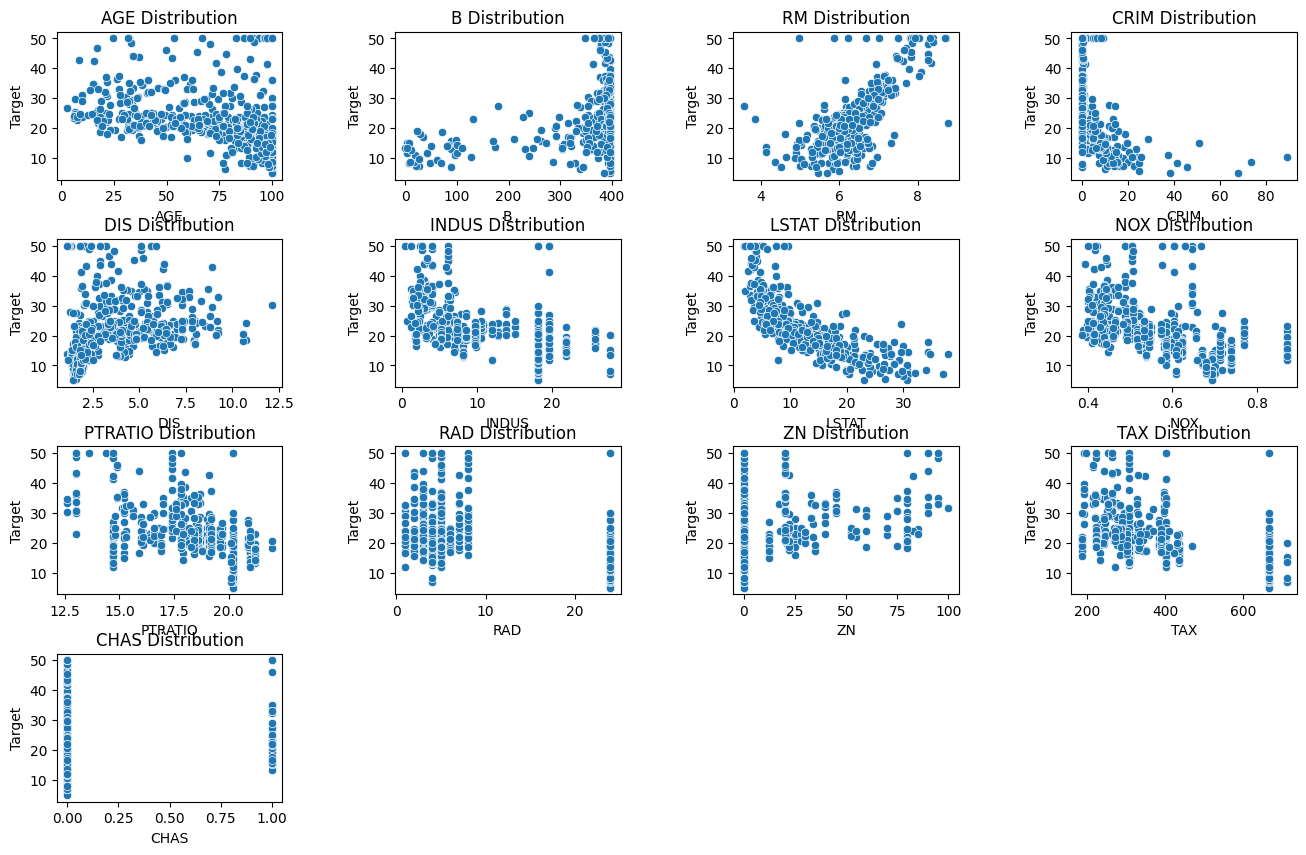

In [54]:
import matplotlib.gridspec as gridspec
grid=gridspec.GridSpec(4,4)
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.4)

bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature,
                   y='Target',
                   data= boston,
                   ax= ax)
    ax.set_title(f'{feature} Distribution')

## 상관계수

In [55]:
boston.corr(method='pearson')   # pearson 상관 계수: 선형 관계만 측정
                                # spearman 상관 계수: 단순 관계만 측정

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


<Axes: >

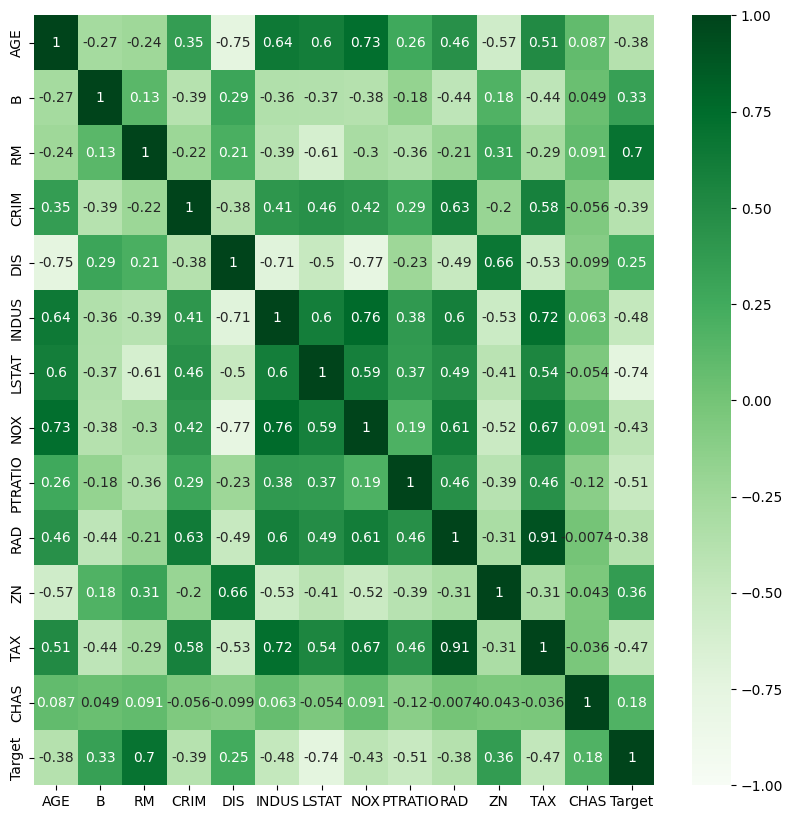

In [56]:
# heatmap으로 확인
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(boston.corr(), annot=True,cmap='Greens',vmin=-1,vmax=1)

## 변수 선택

### p-value값 기준으로 변수 선택

In [57]:
model=sm.OLS.from_formula('Target~'+'+'.join(bst_feature),data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        03:44:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
RM             3.8099      0.418      9.116      0.000       2.989       4.631
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- AGE, INDUS 의 p-value 값이 높으므로 제거

In [58]:
bst_feature1 = [ 'B', 'RM', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

## 선형성을 만족하지 못하는 경우
1. 변수를 빼거나 새로운 변수를 찾기
2. 로그, 지수 변수 변환하기
3. 선형적인 변수들만 가지고 회귀식을 만들고 추가적으로 비선형적인 것들을 더하는 식의 변수 선택법 분석도 가능

## 선형 회귀 분석의 가정
1. 선형성
2. 독립성
- 독립변수 x간 상관관계가 없어야 한다. -> 다중공선성이 낮아야 한다.

## 다중공선성이 높은 경우
1.다중공선성이 높은 변수선택을해서 제거하는 법

2.PCA 의존적인 성분 삭제하는 법

3.정규화 방법

In [59]:
boston_sp1=boston.loc[:,bst_feature1]
boston_sp1

,B,RM,CRIM,DIS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,396.90,6.575,0.00632,4.0900,4.98,0.538,15.3,1,18.0,296,0
1,396.90,6.421,0.02731,4.9671,9.14,0.469,17.8,2,0.0,242,0
2,392.83,7.185,0.02729,4.9671,4.03,0.469,17.8,2,0.0,242,0
3,394.63,6.998,0.03237,6.0622,2.94,0.458,18.7,3,0.0,222,0
4,396.90,7.147,0.06905,6.0622,5.33,0.458,18.7,3,0.0,222,0
...,...,...,...,...,...,...,...,...,...,...,...
501,391.99,6.593,0.06263,2.4786,9.67,0.573,21.0,1,0.0,273,0
502,396.90,6.120,0.04527,2.2875,9.08,0.573,21.0,1,0.0,273,0
503,396.90,6.976,0.06076,2.1675,5.64,0.573,21.0,1,0.0,273,0
504,393.45,6.794,0.10959,2.3889,6.48,0.573,21.0,1,0.0,273,0


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vlf=pd.DataFrame()
vlf['VIF factor']=[variance_inflation_factor(boston_sp1, i) for i in range(boston_sp1.shape[1])]    # boston_sp1의 열 개수만큼
vlf['features']=boston_sp1.columns
vlf=vlf.sort_values('VIF factor').reset_index(drop=True)
vlf

,VIF factor,features
0,1.138233,CHAS
1,2.096854,CRIM
2,2.767383,ZN
3,9.830758,LSTAT
4,12.033324,DIS
5,13.980191,RAD
6,20.017332,B
7,49.602018,TAX
8,62.990497,NOX
9,71.841435,RM


### 해석
- vif가 10 이상이면 다중공선성이 높다고 봄
- 다중공선성은 서로 변수들간의 관계이기 때문에 변수를 제거하게 되면 값들 자체도 변경됨

In [61]:
bst_featurevif1=['B',
 'RM',
 'CRIM',
 'DIS',
 'LSTAT',
 'NOX',
 'RAD',
 'ZN',
 'TAX',
 'CHAS']

boston_sp2 = boston.loc[:,bst_featurevif1]

In [62]:
vif2 = pd.DataFrame()
vif2['VIF factor'] = [variance_inflation_factor(boston_sp2, i) for i in range(boston_sp2.shape[1])]
vif2['features'] = boston_sp2.columns
vif2 = vif2.sort_values('VIF factor').reset_index(drop=True)
vif2

,VIF factor,features
0,1.130217,CHAS
1,2.096229,CRIM
2,2.330543,ZN
3,8.719382,LSTAT
4,10.005240,DIS
5,13.978236,RAD
6,18.556393,B
7,46.293286,TAX
8,55.332168,RM
9,62.872073,NOX


- vif 값이 10 초과인 변수들 제거

In [63]:
bst_featurevif2=[
 'CRIM',
 'DIS',
 'LSTAT',
 'ZN',
 'CHAS']

boston_sp3 = boston.loc[:,bst_featurevif2]

In [64]:
vif3 = pd.DataFrame()
vif3['VIF factor'] = [variance_inflation_factor(boston_sp3, i) for i in range(boston_sp3.shape[1])]
vif3['features'] = boston_sp3.columns
vif3 = vif3.sort_values('VIF factor').reset_index(drop=True)
vif3

,VIF factor,features
0,1.051555,CHAS
1,1.567711,CRIM
2,2.232598,ZN
3,3.088560,LSTAT
4,3.916175,DIS


## 주의
1. vif 수치만 보고 제거하게 되면, 도메인이 없어지고 수치로만 해석하게 됨
2. 어떤 변수가 중요하다고 판단되면 그냥 두는 것도 필요

In [65]:
boston_sp3['Target']=boston['Target']

model3=sm.OLS.from_formula('Target~'+'+'.join(bst_featurevif2),data=boston_sp3)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     159.8
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          3.25e-101
Time:                        03:44:18   Log-Likelihood:                -1598.7
No. Observations:                 506   AIC:                             3209.
Df Residuals:                     500   BIC:                             3235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6749      0.982     39.382      0.000      36.745      40.604
CRIM          -0.1260      0.034     -3.668      0.000      -0.194      -0.059
DIS           -1.3574      0.178     -7.617      0.000      -1.708      -1.007
LSTAT         -0.9414      0.044    -21.193      0.000      -1.029      -0.854
ZN             0.0970      0.015      6.520      0.000       0.068       0.126
CHAS           3.9447      1.020      3.869      0.000       1.942       5.948
==============================================================================
Omnibus:                      114.340   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.265
Skew:                           1.252   Prob(JB):                     3.30e-49
Kurtosis:                       5.078   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 스케일링을 통한 회귀식 변화

In [66]:
boston_1 = boston.copy()

In [67]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()               # 스케일러 생성
scaler.fit(boston_1)                  # 스케일러에 boston_1 데이터 넣어서 피팅
boston_sc1=scaler.transform(boston_1) # 변환

In [68]:
boston_sc1=pd.DataFrame(boston_sc1,columns=boston_1.columns)
boston_sc1

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,-0.120013,0.441052,0.413672,-0.419782,0.140214,-1.287909,-1.075562,-0.144217,-1.459000,-0.982843,0.284830,-0.666608,-0.272599,0.159686
1,0.367166,0.441052,0.194274,-0.417339,0.557160,-0.593381,-0.492439,-0.740262,-0.303094,-0.867883,-0.487722,-0.987329,-0.272599,-0.101524
2,-0.265812,0.396427,1.282714,-0.417342,0.557160,-0.593381,-1.208727,-0.740262,-0.303094,-0.867883,-0.487722,-0.987329,-0.272599,1.324247
3,-0.809889,0.416163,1.016303,-0.416750,1.077737,-1.306878,-1.361517,-0.835284,0.113032,-0.752922,-0.487722,-1.106115,-0.272599,1.182758
4,-0.511180,0.441052,1.228577,-0.412482,1.077737,-1.306878,-1.026501,-0.835284,0.113032,-0.752922,-0.487722,-1.106115,-0.272599,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.018673,0.387217,0.439316,-0.413229,-0.625796,0.115738,-0.418147,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.014454
502,0.288933,0.441052,-0.234548,-0.415249,-0.716639,0.115738,-0.500850,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.210362
503,0.797449,0.441052,0.984960,-0.413447,-0.773684,0.115738,-0.983048,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,0.148802
504,0.736996,0.403225,0.725672,-0.407764,-0.668437,0.115738,-0.865302,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.057989


In [69]:
bst_sc1col=['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO','RAD', 'ZN', 'TAX', 'CHAS']

In [70]:
boston_sc_1 = boston_sc1.loc[:,bst_sc1col]

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(boston_sc_1, i) for i in range(boston_sc_1.shape[1])]
vif['features'] = boston_sc_1.columns
vif = vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,1.073995,CHAS
1,1.348521,B
2,1.792192,CRIM
3,1.799084,PTRATIO
4,1.933744,RM
5,2.298758,ZN
6,2.941491,LSTAT
7,3.100826,AGE
8,3.955945,DIS
9,3.991596,INDUS


- 스케일링 후 다중공선성이 많이 줄어들음

In [74]:
boston_sc_1['Target']= boston_sc1['Target']

model4=sm.OLS.from_formula('Target~'+'+'.join(bst_sc1col),data=boston_sc_1)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        03:45:49   Log-Likelihood:                -376.55
No. Observations:                 506   AIC:                             781.1
Df Residuals:                     492   BIC:                             840.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.235e-16      0.023  -2.28e-14      1.000      -0.045       0.045
AGE            0.0021      0.040      0.052      0.958      -0.077       0.082
B              0.0924      0.027      3.467      0.001       0.040       0.145
RM             0.2911      0.032      9.116      0.000       0.228       0.354
CRIM          -0.1010      0.031     -3.287      0.001      -0.161      -0.041
DIS           -0.3378      0.046     -7.398      0.000      -0.428      -0.248
INDUS          0.0153      0.046      0.334      0.738      -0.075       0.105
LSTAT         -0.4074      0.039    -10.347      0.000      -0.485      -0.330
NOX           -0.2238      0.048     -4.651      0.000      -0.318      -0.129
PTRATIO       -0.2243      0.031     -7.283      0.000      -0.285      -0.164
RAD            0.2897      0.063      4.613      0.000       0.166       0.413
ZN             0.1177      0.035      3.382      0.001       0.049       0.186
TAX           -0.2260      0.069     -3.280      0.001      -0.361      -0.091
CHAS           0.0742      0.024      3.118      0.002       0.027       0.121
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 실제로는 변수마다 다 다르게 스케일링 진행해야 한다
- 변수의 분포를 보고 어떤 스케일링을 할지 결정

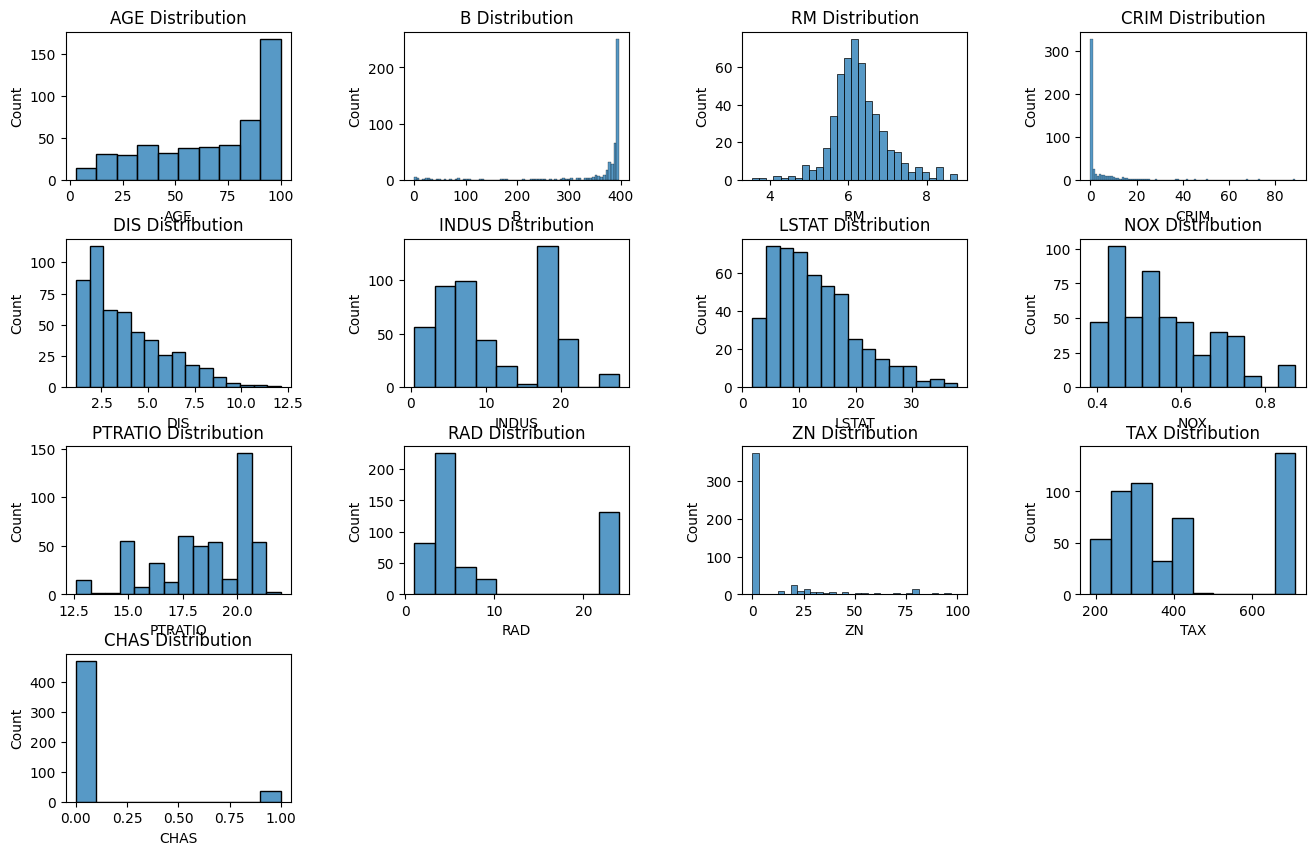

In [75]:
# 실제 타겟과 변수들의 관계 확인

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.4)


bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):     # enumerate로 인덱스와 데이터 한 번에 가져오기
    ax = plt.subplot(grid[idx])
    sns.histplot(x=boston[feature],ax=ax)       # 히스토그램
    ax.set_title(f'{feature} Distribution')